In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=[r'\usepackage{sansmath}', r'\sansmath']) #r'\usepackage{DejaVuSans}'
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans']})

rc('xtick.major', pad=12)
rc('ytick.major', pad=12)
rc('grid', linewidth=1.3)


%matplotlib inline

<ipython-input-1-3a4983def31d>:7: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  rc('text.latex', preamble=[r'\usepackage{sansmath}', r'\sansmath']) #r'\usepackage{DejaVuSans}'


In [2]:
from colors import *

In [3]:
def rescale(lst):
    lst = np.array(lst)
    return (lst - np.min(lst)) / (np.max(lst - np.min(lst)))

In [4]:
sns.set_style("whitegrid")

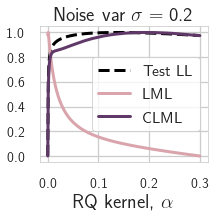

In [15]:
arr = np.load("data/gp_rq/alpha_optimization_big_noise.npz")
plt.figure(figsize=(3, 2.5))
plt.plot(arr["alpha"], rescale(arr["test_likelihood"]), "--k", label="Test LL", lw=3)
plt.plot(arr["alpha"], rescale(arr["mll"]), label="LML", c=sanae_colors[1], lw=3)
plt.plot(arr["alpha"], rescale(arr["cmll"]), label="CLML", c=sanae_colors[4], lw=3)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"RQ kernel, $\alpha$", fontsize=20)
plt.title(r"Noise var $\sigma = 0.2$", fontsize=20)
plt.savefig("../../Papers/marginal_likelihood/figures/gp_rq/high_noise.pdf",
           bbox_inches="tight")

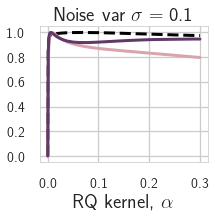

In [14]:
arr = np.load("data/gp_rq/alpha_optimization_small_noise.npz")
plt.figure(figsize=(3, 2.5))
plt.plot(arr["alpha"], rescale(arr["test_likelihood"]), "--k", label="Test LL", lw=3)
plt.plot(arr["alpha"], rescale(arr["mll"]), label="LML", c=sanae_colors[1], lw=3)
plt.plot(arr["alpha"], rescale(arr["cmll"]), label="CLML", c=sanae_colors[4], lw=3)
# plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"RQ kernel, $\alpha$", fontsize=20)
plt.title(r"Noise var $\sigma = 0.1$", fontsize=20)
plt.savefig("../../Papers/marginal_likelihood/figures/gp_rq/small_noise.pdf",
           bbox_inches="tight")

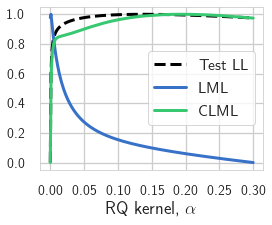

In [11]:
# arr = np.load("data/gp_rq/alpha_optimization_big_noise.npz")
# plt.figure(figsize=(4, 3))
# plt.plot(arr["alpha"], rescale(arr["test_likelihood"]), "--k", label="Test LL", lw=3)
# plt.plot(arr["alpha"], rescale(arr["mll"]), label="LML", c=color12, lw=3)
# plt.plot(arr["alpha"], rescale(arr["cmll"]), label="CLML", c=color11, lw=3)
# plt.legend(fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel(r"RQ kernel, $\alpha$", fontsize=18)
# plt.savefig("../../Papers/marginal_likelihood/figures/gp_rq/high_noise.pdf",
#            bbox_inches="tight")

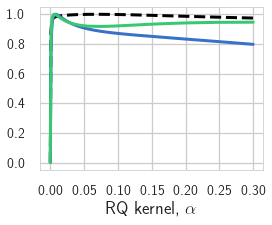

In [12]:
# arr = np.load("data/gp_rq/alpha_optimization_small_noise.npz")
# plt.figure(figsize=(4, 3))
# plt.plot(arr["alpha"], rescale(arr["test_likelihood"]), "--k", label="Test LL", lw=3)
# plt.plot(arr["alpha"], rescale(arr["mll"]), label="LML", c=color12, lw=3)
# plt.plot(arr["alpha"], rescale(arr["cmll"]), label="CLML", c=color11, lw=3)
# # plt.legend(fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel(r"RQ kernel, $\alpha$", fontsize=18)
# plt.savefig("../../Papers/marginal_likelihood/figures/gp_rq/small_noise.pdf",
#            bbox_inches="tight")

## GP fit

In [7]:
arr = np.load("data/gp_rq/learning_curve.npz")

<ipython-input-27-97b9d2f47535>:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


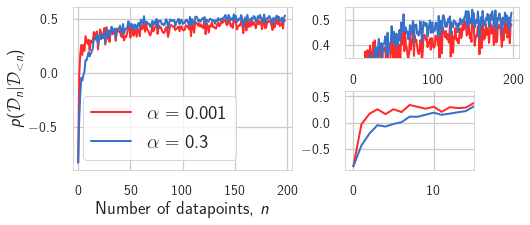

In [27]:
f = plt.figure(figsize=(8, 3))
ax0 = plt.subplot2grid((6, 10), (0, 0), colspan=5, rowspan=6)
ax1 = plt.subplot2grid((6, 10), (0, 6), colspan=4, rowspan=2)
ax2 = plt.subplot2grid((6, 10), (3, 6), colspan=3, rowspan=3)

ax0.plot(arr["mlls_0001"][1:] - arr["mlls_0001"][:-1], label=r"$\alpha = 0.001$", lw=2, color=color10)
# ax0.plot(arr["mlls_01"][1:] - arr["mlls_01"][:-1], label=r"$\alpha = 0.1$", lw=2, color=color1)
ax0.plot(arr["mlls_03"][1:] - arr["mlls_03"][:-1], label=r"$\alpha = 0.3$", lw=2, color=color12)
ax0.legend(fontsize=20)
ax0.tick_params(axis='both', which='major', labelsize=14)
ax0.set_xlim(-5, 205)
ax0.set_ylabel(r"$p(\mathcal{D}_n \vert \mathcal D_{<n})$", fontsize=18)
ax0.set_xlabel(r"Number of datapoints, $n$", fontsize=18)

ax1.plot(arr["mlls_0001"][1:] - arr["mlls_0001"][:-1], label=r"$\alpha = 0.001$", lw=2, color=color10)
# ax1.plot(arr["mlls_01"][1:] - arr["mlls_01"][:-1], label=r"$\alpha = 0.1$", lw=2, color=color1)
ax1.plot(arr["mlls_03"][1:] - arr["mlls_03"][:-1], label=r"$\alpha = 0.3$", lw=2, color=color12)
ax1.set_ylim(0.35, 0.55)
ax1.tick_params(axis='both', which='major', labelsize=14)
# ax1.set_xlim(-5, 205)

ax2.plot(arr["mlls_0001"][1:] - arr["mlls_0001"][:-1], label=r"$\alpha = 0.001$", lw=2, color=color10)
# ax2.plot(arr["mlls_01"][1:] - arr["mlls_01"][:-1], label=r"$\alpha = 0.1$", lw=2, color=color1)
ax2.plot(arr["mlls_03"][1:] - arr["mlls_03"][:-1], label=r"$\alpha = 0.3$", lw=2, color=color12)
ax2.set_xlim(-1, 15)
ax2.tick_params(axis='both', which='major', labelsize=14)

# ax0.set_title("Z", fontsize=16, color="white")

plt.tight_layout()
plt.savefig("../../Papers/marginal_likelihood/figures/gp_rq/learning_curve.pdf",
           bbox_inches="tight")

## Model fit

In [28]:
sns.set_style("darkgrid")

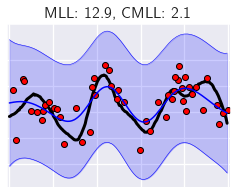

In [46]:
arr = np.load("data/gp_rq/big_noise_cmll_fit.npz")
plt.figure(figsize=(4, 3))
plt.plot(arr["x_test"], arr["f_test"], "-k", lw=3)
plt.plot(arr["x_train"], arr["y_train"], "ro", markeredgecolor="k")
plt.plot(arr["x_test"], arr["pred_mu"], color="b")
plt.fill_between(arr["x_test"],
                 arr["pred_mu"] + arr["pred_sigma"] * 2,
                 arr["pred_mu"] - arr["pred_sigma"] * 2,
                 alpha=0.2, color="b")
plt.plot(arr["x_test"], arr["pred_mu"] + arr["pred_sigma"] * 2, color="b", lw=0.5)
plt.plot(arr["x_test"], arr["pred_mu"] - arr["pred_sigma"] * 2, color="b", lw=0.5)
plt.xlim(-0.01, 1.01)
plt.xticks([0., .2, .4, .6, .8, 1.], ["", "", "", "", "", ""])
plt.yticks([-0.2, 0., 0.2, 0.4, 0.6], ["", "", "", "", ""])
plt.title("MLL: 12.9, CMLL: 2.1", fontsize=16)
plt.savefig("../../Papers/marginal_likelihood/figures/gp_rq/cmll_fit.pdf",
           bbox_inches="tight")

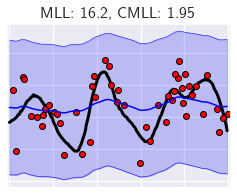

In [47]:
arr = np.load("data/gp_rq/big_noise_mll_fit.npz")
plt.figure(figsize=(4, 3))
plt.plot(arr["x_test"], arr["f_test"], "-k", lw=3)
plt.plot(arr["x_train"], arr["y_train"], "ro", markeredgecolor="k")
plt.plot(arr["x_test"], arr["pred_mu"], color="b")
plt.fill_between(arr["x_test"],
                 arr["pred_mu"] + arr["pred_sigma"] * 2,
                 arr["pred_mu"] - arr["pred_sigma"] * 2,
                 alpha=0.2, color="b")
plt.plot(arr["x_test"], arr["pred_mu"] + arr["pred_sigma"] * 2, color="b", lw=0.5)
plt.plot(arr["x_test"], arr["pred_mu"] - arr["pred_sigma"] * 2, color="b", lw=0.5)
plt.xlim(-0.01, 1.01)
plt.xticks([0., .2, .4, .6, .8, 1.], ["", "", "", "", "", ""])
plt.yticks([-0.2, 0., 0.2, 0.4, 0.6], ["", "", "", "", ""])
plt.title("MLL: 16.2, CMLL: 1.95", fontsize=16)
plt.savefig("../../Papers/marginal_likelihood/figures/gp_rq/mll_fit.pdf",
           bbox_inches="tight")